In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
EVENTS_DATA_FOLDER = "data/raw_other_date_0"
DATA_FILE_ALARMS = "alarms.csv"

# Alarms analysis

In [49]:
df = pd.read_csv(f"{EVENTS_DATA_FOLDER}/{DATA_FILE_ALARMS}", sep=";")

In [50]:
df.head(10)

,id,region_id,region_title,region_city,all_region,start,end,clean_end,intersection_alarm_id
0,2,3,Вінниччина,Вінниця,0,2022-02-25 22:55:42,2022-02-25 23:41:53,2022-02-25 23:41:53,NaN
1,4,12,Львівщина,Львів,0,2022-02-26 06:26:17,2022-02-26 07:15:28,2022-02-26 07:15:28,NaN
2,5,14,Одещина,Одеса,0,2022-02-26 07:16:58,2022-02-26 07:47:03,2022-02-26 07:47:03,NaN
3,6,6,Житомирщина,Житомир,0,2022-02-26 08:05:54,2022-02-26 09:36:36,2022-02-26 09:36:36,NaN
4,7,3,Вінниччина,Вінниця,0,2022-02-26 08:39:39,2022-02-26 10:42:41,2022-02-26 10:42:41,NaN
5,9,3,Вінниччина,Вінниця,0,2022-02-26 10:58:23,2022-02-26 11:59:40,2022-02-26 11:59:40,NaN
6,10,12,Львівщина,Львів,0,2022-02-26 13:44:44,2022-02-26 14:27:25,2022-02-26 14:27:25,NaN
7,3,16,Рівненщина,Рівненська обл.,1,2022-02-26 15:54:53,2022-02-26 16:14:46,2022-02-26 16:14:46,NaN
8,1,2,Волинь,Волинська обл.,1,2022-02-26 16:08:26,2022-02-26 16:39:26,2022-02-26 16:39:26,NaN
9,11,21,Хмельниччина,Деражня,0,2022-02-26 16:10:29,2022-02-26 17:19:57,2022-02-26 17:19:57,NaN


# Dataset size

In [51]:
df.shape

(19933, 9)

In [52]:
df.describe()

,id,region_id,all_region,intersection_alarm_id
count,19933.000000,19933.000000,19933.000000,2098.000000
mean,19504.320925,11.159785,0.696283,14686.461868
std,14872.354802,6.374564,0.459874,12632.068063
min,1.000000,1.000000,0.000000,45.000000
25%,5106.000000,5.000000,0.000000,3826.500000
50%,17421.000000,10.000000,1.000000,10473.000000
75%,32528.000000,17.000000,1.000000,22397.000000
max,47547.000000,24.000000,1.000000,47488.000000


In [53]:
df.dtypes

id                         int64
region_id                  int64
region_title              object
region_city               object
all_region                 int64
start                     object
end                       object
clean_end                 object
intersection_alarm_id    float64
dtype: object

## First alarm

In [54]:
df.start.min()

'2022-02-25 22:55:42'

## Last alarm

In [55]:
df.start.max()

'2023-01-20 22:51:11'

## Alarms duration

In [56]:
df ["start_time"] = pd.to_datetime(df["start"])
df ["end_time"] = pd.to_datetime(df["end"])

In [57]:
df ["duration"] = df["end_time"] - df["start_time"]

In [58]:
df.head(10)

,id,region_id,region_title,region_city,all_region,start,end,clean_end,intersection_alarm_id,start_time,end_time,duration
0,2,3,Вінниччина,Вінниця,0,2022-02-25 22:55:42,2022-02-25 23:41:53,2022-02-25 23:41:53,NaN,2022-02-25 22:55:42,2022-02-25 23:41:53,0 days 00:46:11
1,4,12,Львівщина,Львів,0,2022-02-26 06:26:17,2022-02-26 07:15:28,2022-02-26 07:15:28,NaN,2022-02-26 06:26:17,2022-02-26 07:15:28,0 days 00:49:11
2,5,14,Одещина,Одеса,0,2022-02-26 07:16:58,2022-02-26 07:47:03,2022-02-26 07:47:03,NaN,2022-02-26 07:16:58,2022-02-26 07:47:03,0 days 00:30:05
3,6,6,Житомирщина,Житомир,0,2022-02-26 08:05:54,2022-02-26 09:36:36,2022-02-26 09:36:36,NaN,2022-02-26 08:05:54,2022-02-26 09:36:36,0 days 01:30:42
4,7,3,Вінниччина,Вінниця,0,2022-02-26 08:39:39,2022-02-26 10:42:41,2022-02-26 10:42:41,NaN,2022-02-26 08:39:39,2022-02-26 10:42:41,0 days 02:03:02
5,9,3,Вінниччина,Вінниця,0,2022-02-26 10:58:23,2022-02-26 11:59:40,2022-02-26 11:59:40,NaN,2022-02-26 10:58:23,2022-02-26 11:59:40,0 days 01:01:17
6,10,12,Львівщина,Львів,0,2022-02-26 13:44:44,2022-02-26 14:27:25,2022-02-26 14:27:25,NaN,2022-02-26 13:44:44,2022-02-26 14:27:25,0 days 00:42:41
7,3,16,Рівненщина,Рівненська обл.,1,2022-02-26 15:54:53,2022-02-26 16:14:46,2022-02-26 16:14:46,NaN,2022-02-26 15:54:53,2022-02-26 16:14:46,0 days 00:19:53
8,1,2,Волинь,Волинська обл.,1,2022-02-26 16:08:26,2022-02-26 16:39:26,2022-02-26 16:39:26,NaN,2022-02-26 16:08:26,2022-02-26 16:39:26,0 days 00:31:00
9,11,21,Хмельниччина,Деражня,0,2022-02-26 16:10:29,2022-02-26 17:19:57,2022-02-26 17:19:57,NaN,2022-02-26 16:10:29,2022-02-26 17:19:57,0 days 01:09:28


In [59]:
print("min", df["duration"].min())
print("mean", df["duration"].mean())
print("max", df["duration"].max())

min 0 days 00:00:27
mean 0 days 00:57:13.917573872
max 0 days 18:43:08


In [60]:
df["duration_minutes"] = df["duration"]/np.timedelta64(1,'m')
df["x_1"] = 1

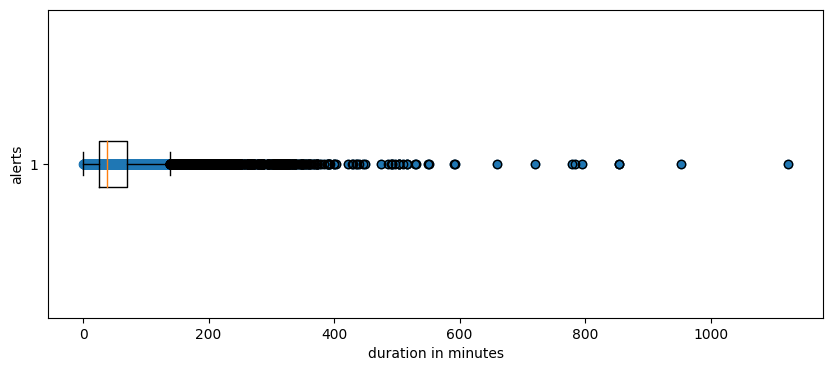

In [61]:
fig = plt.figure(figsize = (10, 4))

#Create plot
plt.boxplot(df["duration_minutes"], vert = False)
plt.ylabel("alerts")
plt.xlabel("duration in minutes")
plt.scatter(df["duration_minutes"], df["x_1"])

#show plot
plt.show()

<Axes: xlabel='duration_minutes'>

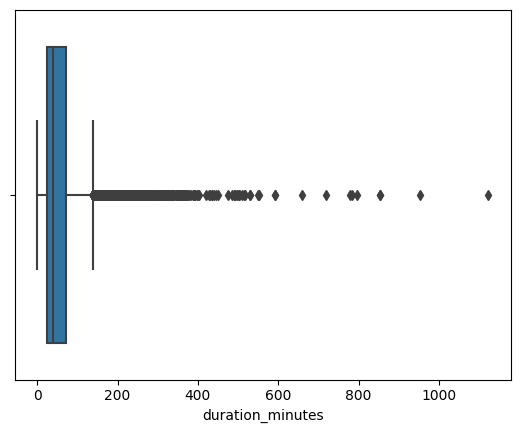

In [62]:
sns.boxplot(x = df["duration_minutes"])

<Axes: xlabel='duration_minutes', ylabel='region_title'>

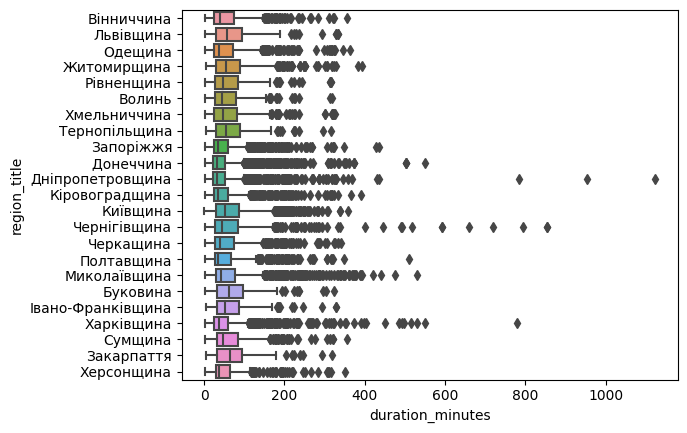

In [63]:
sns.boxplot(data = df, x = "duration_minutes", y = "region_title")

In [64]:
df["region_title"].value_counts()

️Донеччина           3490
Харківщина           1619
Дніпропетровщина     1591
Київщина             1540
Миколаївщина         1536
Запоріжжя            1335
Кіровоградщина       1112
Полтавщина            979
Черкащина             784
Житомирщина           710
Одещина               688
Сумщина               646
Чернігівщина          623
Вінниччина            514
Хмельниччина          444
Херсонщина            367
Волинь                343
Рівненщина            326
Тернопільщина         295
Львівщина             279
Івано-Франківщина     277
Буковина              225
Закарпаття            210
Name: region_title, dtype: int64

<Axes: >

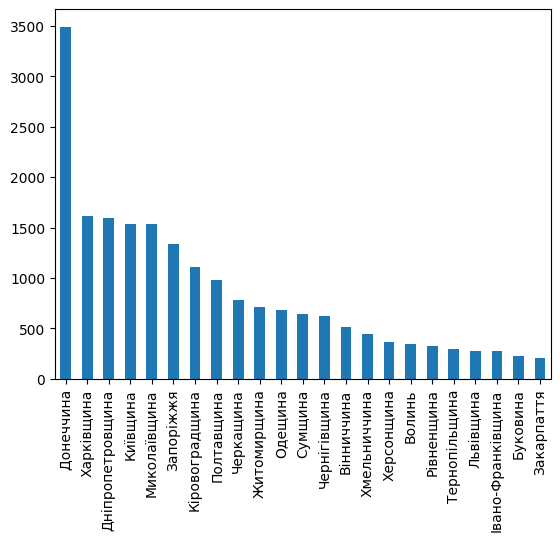

In [65]:
df["region_title"].value_counts().plot(kind = 'bar')

In [66]:
df["region_title"].nunique()

23

In [67]:
df["region_city"].nunique()

174

In [68]:
df["region_city"].value_counts()

Харківська обл.          1527
Донецька обл.            1334
Запорізька обл.          1275
Дніпропетровська обл.    1203
Миколаївська обл.         877
                         ... 
Білогородка                 1
Тростянець                  1
Веселівка                   1
Куп'янськ                   1
Циркуни                     1
Name: region_city, Length: 174, dtype: int64

<Axes: >

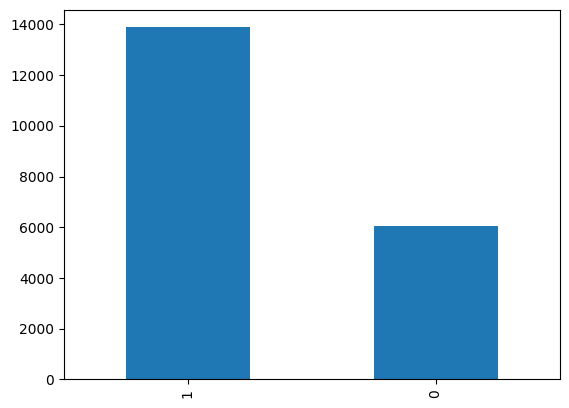

In [71]:
df["all_region"].value_counts().plot(kind = 'bar')

In [73]:
df["intersection_alarm_id"].nunique()

1262

In [74]:
df[df["region_city"] == "Київ"].shape

(605, 14)

In [75]:
df[df["region_city"] == "Київ"]["duration_minutes"].sum()/60

666.6872222222222

In [77]:
df["region_city"].nunique()

174